### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# EDA

### Load the Data

In [2]:
data = pd.read_csv("../input/heart-disease-dataset/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### OVERVIEW

**Dataset statistics**
- **Number of rows: $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ 1025**
- **Number of columns: $\;\;\;\;\;\;\;\;\;\;\;\;\;$ 14**
- **Missing values: $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ 0** 
- **Missing values (%): $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ 0.0%**

### Number of Rows and Columns

In [3]:
data.shape

(1025, 14)

### Column Names

In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

- **AGE:** $\;\;\;\;\;\;\;\;\;\;\;\;$ Age in years
- **SEX:** $\;\;\;\;\;\;\;\;\;\;\;\;$ 1 = Male; 0 = Female
- **CP:** $\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Chest Pain type
- **TRESTBPS:** $\;\;\;\;$Resting Blood Pressure (in mm Hg on Admission to the Hospital)
- **CHOL:** $\;\;\;\;\;\;\;\;\;\;$ Serum Cholestoral in mg/dl
- **FPS:** $\;\;\;\;\;\;\;\;\;\;\;\;\;$ Fasting Blood Sugar > 120 mg/dl (1 = True; 0 = False)
- **RESTECG:** $\;\;\;\;\;$ Resting Electrocardiographic Results
- **THALACH:** $\;\;\;\;\;$ Maximum Heart Rate Achieved
- **EXANG:** $\;\;\;\;\;\;\;\;\;$ Exercise induced Angina (1 = yes; 0 = no)
- **OLDPEAK:** $\;\;\;\;\;$ ST Depression induced by Exercise Relative to Rest
- **SLOPE:** $\;\;\;\;\;\;\;\;\;$ The Slope of the Peak Exercise ST Segment
- **CA:** $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$Number of Major Vessels (0-3) Colored by Flourosopy
- **THAL:** $\;\;\;\;\;\;\;\;\;\;\;$ A blood disorder called Thalassemia (3 = Normal; 6 = Fixed Defect; 7 = Reversable Defect)
- **TARGET:** $\;\;\;\;\;\;\;\;$ 1 or 0

### Column INFO

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Column Data Types

In [6]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

After a quick glimpse of the data set to get an initial understanding of the variables and their formats, the next step is to check for the number of missing values in each column.

# Data Cleaning

### Missing Values

In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Now there are no null values. so there is no need for data cleaning.

## Data Analysis and Insights

### Minimum,maximum and average age of the persons having heart disease

In [8]:
data.groupby(["target"])["age"].agg(["max","min","mean"])

,max,min,mean
target,,,
0,77,35,56.569138
1,76,29,52.408745


### Number of peoples having heart disease?

In [9]:
data.target.value_counts()

1    526
0    499
Name: target, dtype: int64

Around 526 peoples are having heart disease.

### Is sex is related to heart disease?

In [10]:
data["sex"] = data["sex"].map({0:"Female", 1:"Male"})

In [11]:
data.groupby(data["sex"])["target"].agg(["value_counts"])

value_counts
sex    target              
Female 1                226
       0                 86
Male   0                413
       1                300

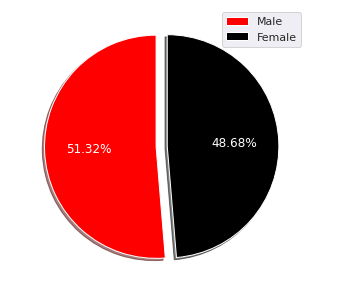

In [12]:
sex = ["Male", "Female"]
values = data["target"].value_counts()
color = ["#FF0000", "#000000"]

plt.figure(figsize = (5, 7))
plt.pie(values, labels = sex, colors = color, explode = (0.1, 0), textprops = {"color":"w"}, autopct = "%.2f%%", shadow = True, startangle = 90)

plt.legend();

Ratio of **Male** to **Female** is approx **1:1**

Insight:Males are having more heart disease as compared to females.

### Relation between Sex and Slope

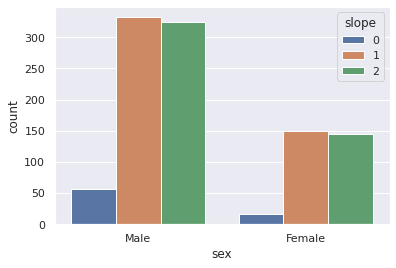

In [13]:
sns.countplot(x = data["sex"], hue = data["slope"]);

The slope value is higher in the case of **Males**

### How blood pressure is related with heart disease?

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 24.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 29.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


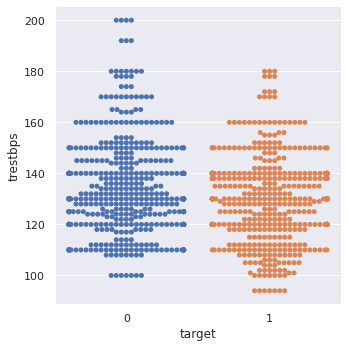

In [14]:
sns.catplot(x="target",y="trestbps",data=data,kind="swarm")

Insight: People having blood pressure between 120 - 140 are more likely to have a heart disease.

### How chest pain is related with heart disease

In [15]:
data.groupby(data["cp"])["target"].agg(["value_counts"])

value_counts
cp target              
0  0                375
   1                122
1  1                134
   0                 33
2  1                219
   0                 65
3  1                 51
   0                 26

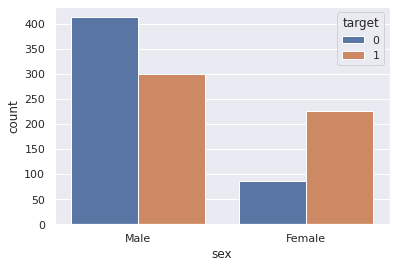

In [16]:
sns.countplot(x = "sex",data = data, hue = "target");

### Chest Pain Classification Sex-wise

chest pain:
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease

In [17]:
data.groupby("sex")["cp"].agg(["value_counts"])

value_counts
sex    cp              
Female 0            133
       2            109
       1             57
       3             13
Male   0            364
       2            175
       1            110
       3             64

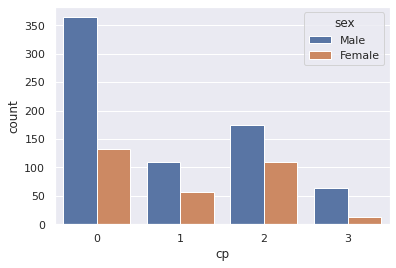

In [18]:
sns.countplot(x = "cp", data = data, hue = "sex");

Insight: Most of the peoples are having  Typical angina chest pain. 

### Relation between Chest Pain vs Target 

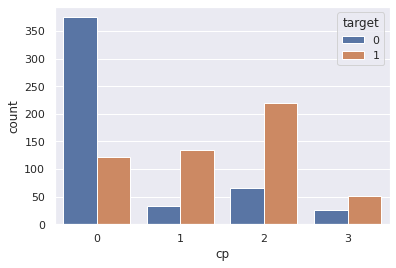

In [19]:
sns.countplot(x = "cp", data = data, hue = "target");

Insight: Peoples having  Typical angina chest pain are more likely to have heart disease.

### Do Males and Females absorb glucose differently?

In [20]:
data.groupby(["sex"])["fbs"].agg(["value_counts"])

value_counts
sex    fbs              
Female 0             270
       1              42
Male   0             602
       1             111

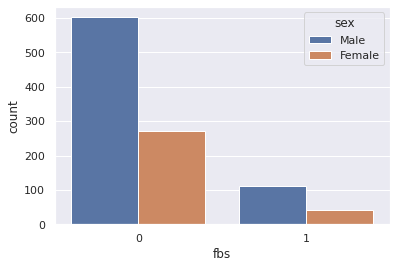

In [21]:
sns.countplot(x = "fbs", data = data, hue = "sex");

**Females** have lower fasting glucose than **Males**

### Electrocardiographic relation with heart disease

-Value 0: normal

-Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

-Value 2: showing probable or definite left ventricular hypertrophy

In [22]:
data.groupby(data["restecg"])["target"].agg(["count"])

,count
restecg,
0,497
1,513
2,15


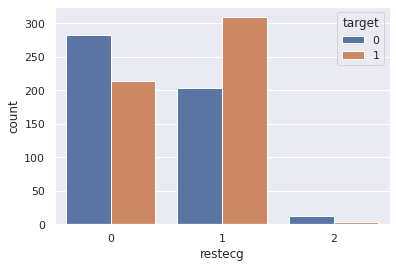

In [23]:
sns.countplot(x = "restecg", data = data, hue = "target");

Insight:The persons having ST-T wave abnormality resting electrocardiographic are more likely to have heart disease

### Thalach(maximum heart rate achieved) is related with target?

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


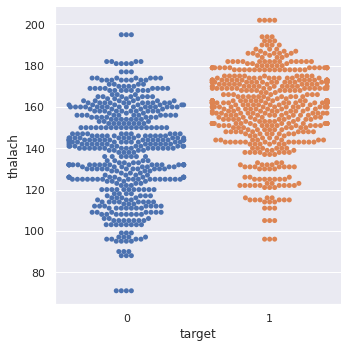

In [24]:
sns.catplot(x="target",y="thalach",data=data,kind="swarm")

Insight: people having heart rate between 140 to 180 are more likely to have a heart disease.

### Gender related differences in Electrocardiographic parameters

In [25]:
data.groupby(["sex"])["restecg"].agg(["value_counts"])

value_counts
sex    restecg              
Female 1                 157
       0                 144
       2                  11
Male   1                 356
       0                 353
       2                   4

### How does gender affect angina?

In [26]:
data.groupby(["sex"])["exang"].agg(["value_counts"])

value_counts
sex    exang              
Female 0               238
       1                74
Male   0               442
       1               271

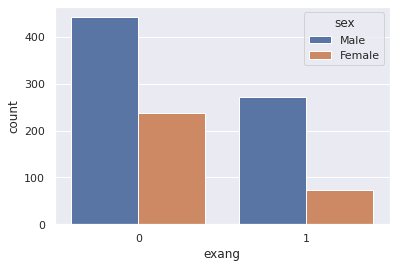

In [27]:
sns.countplot(x = "exang", data = data, hue = "sex");

Although the prevalence of **angina** in females is increasing, **Females** are less likely than **Males** to undergo invasive management of coronary disease

# How agina is related with heart disease?

In [28]:
data.groupby(["target"])["exang"].agg(["value_counts"])

value_counts
target exang              
0      1               274
       0               225
1      0               455
       1                71

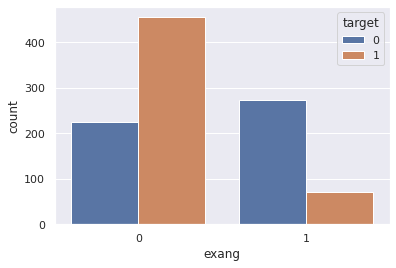

In [29]:
sns.countplot(x = "exang", data = data, hue = "target");

Insight :The persons having Exercise induced angina are less likely to have heart disease.

### Is gender a risk factor for Coronary Artery Disease?

In [30]:
data.groupby(["sex"])["ca"].agg(["value_counts"])

value_counts
sex    ca              
Female 0            204
       1             49
       2             45
       3             14
Male   0            374
       1            177
       2             89
       3             55
       4             18

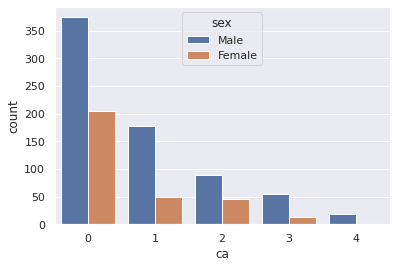

In [31]:
sns.countplot(x = "ca", data = data, hue = "sex");

**Males** have a higher propensity of developing **Coronary Artery Disease (CAD)** than **Females**

### Thalassemia Classification

# value 0: Null

Value 1: normal blood flow

Value 2: fixed defect (no blood flow in some part of the heart)

Value 3: reversible defect (a blood flow is observed but it is not normal)

# How Thalassemia is related with heart disease.

In [32]:
data.groupby(["thal"])["target"].agg(["value_counts"])

value_counts
thal target              
0    0                  4
     1                  3
1    0                 43
     1                 21
2    1                412
     0                132
3    0                320
     1                 90

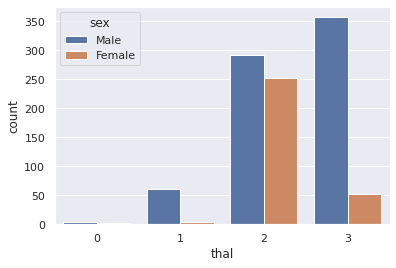

In [33]:
sns.countplot(x = "thal", data = data, hue = "sex");

### Is Thalassemia more common in Males or Females?

In [34]:
data.groupby(["sex"])["thal"].agg(["value_counts"])

value_counts
sex    thal              
Female 2              252
       3               53
       1                4
       0                3
Male   3              357
       2              292
       1               60
       0                4

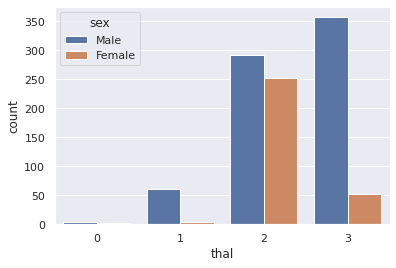

In [35]:
sns.countplot(x = "thal", data = data, hue = "sex");

- Thalassemia can affect both **Male** and **Female**
- **Male** patients are more frequently affected than **Females**

### How many '0' and '1' we have in our Dependent Variable

In [36]:
data["target"].agg(["value_counts"])

,value_counts
1,526
0,499


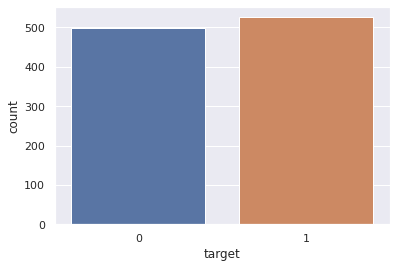

In [37]:
sns.countplot(x = data["target"]);

The ratio between **1** and **0** is much less than **1.5** which indicates that the target feature is not imbalanced.

# Step 4: Data preparation

### Label Encoding

In [38]:
print (data["sex"].unique())

#Replacing Female as 0 and Male as 1 in sex column in the dataset

data["sex"] = data["sex"].map({"Female":0, "Male":1})
print (data["sex"].unique())

['Male' 'Female']
[1 0]


### Detecting Outliers

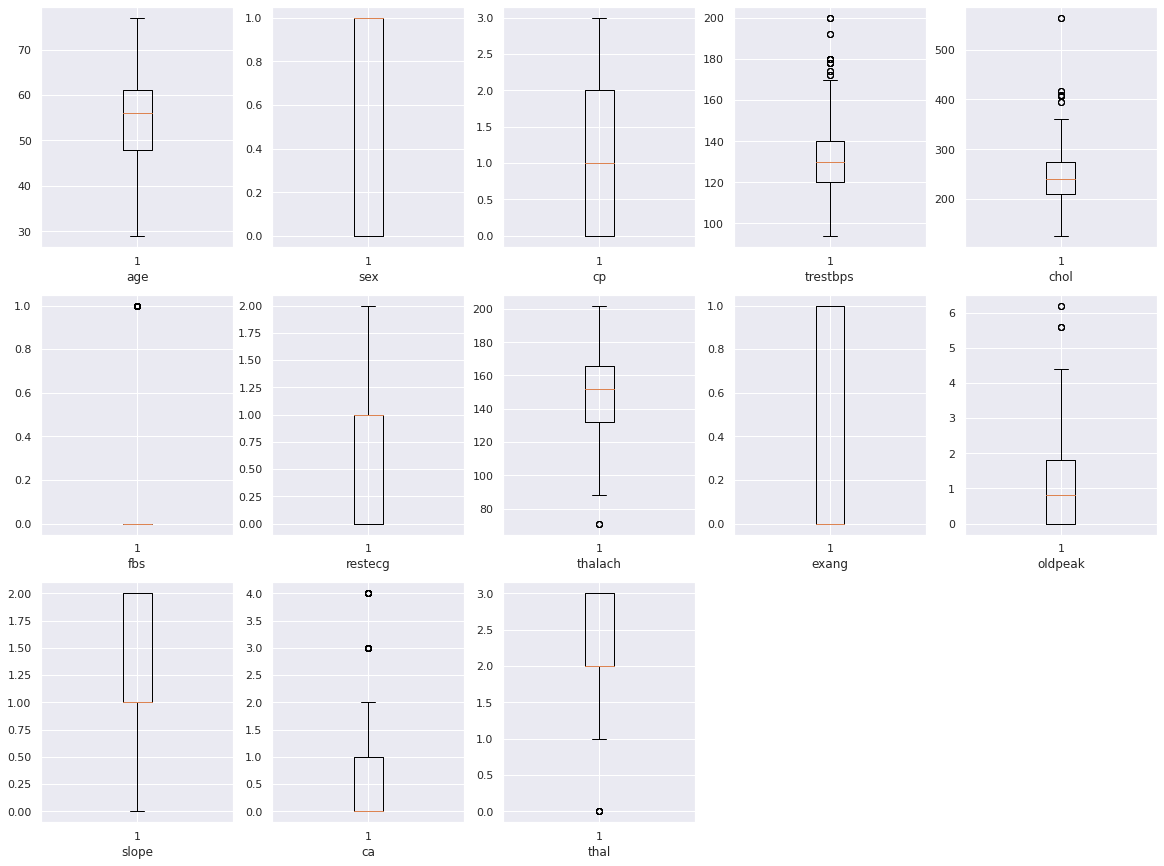

In [39]:
col = 1
plt.figure(figsize = (20, 15))
for i in data.columns:
    if col < 14:
        plt.subplot(3, 5, col)
        plt.boxplot(data[i])
        plt.xlabel(i)
    col = col + 1

we can see that there are many outliers in the column trestbps,chol,ca,thalach,oldpeak
so i will try to remove these outliers.

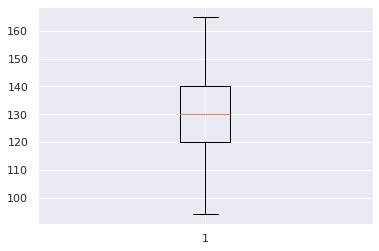

In [40]:
#Removing outliers from the column trestbps
q3=data["trestbps"].quantile(q=0.75)
q1=data["trestbps"].quantile(q=0.25)
IQR=q3-q1
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
k=data[data["trestbps"]>IQR_upper_limit]
data=data[data["trestbps"]<IQR_upper_limit]
plt.boxplot(data["trestbps"]);

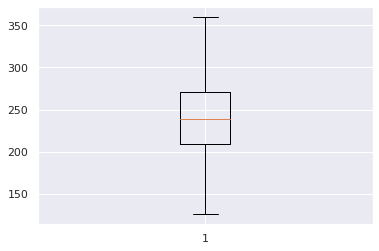

In [41]:
#Removing outliers from the column chol
q3=data["chol"].quantile(q=0.75)
q1=data["chol"].quantile(q=0.25)
IQR=q3-q1
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
k=data[data["chol"]>IQR_upper_limit]
data=data[data["chol"]<IQR_upper_limit]
plt.boxplot(data["chol"]);

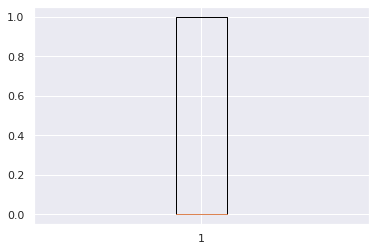

In [42]:
#Removing outliers from the column ca:l
q3=data["ca"].quantile(q=0.75)
q1=data["ca"].quantile(q=0.25)
IQR=q3-q1
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
k=data[data["ca"]>IQR_upper_limit]
data=data[data["ca"]<IQR_upper_limit]
plt.boxplot(data["ca"]);

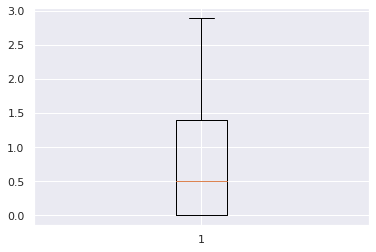

In [43]:
#Removing outliers from the column oldpeak
q3=data["oldpeak"].quantile(q=0.75)
q1=data["oldpeak"].quantile(q=0.25)
IQR=q3-q1
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
k=data[data["oldpeak"]>IQR_upper_limit]
data=data[data["oldpeak"]<IQR_upper_limit]
plt.boxplot(data["oldpeak"]);

Now the data is cleaned and i will checkh the co-relation between the featues.

### Correlation Heatmap

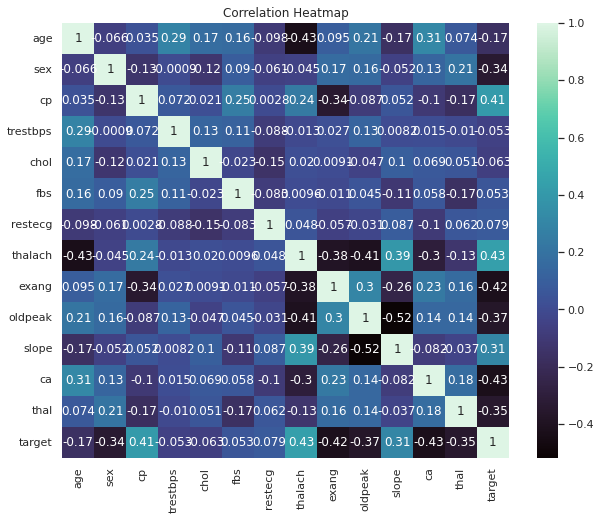

In [44]:
x = data.corr()

plt.figure(figsize = (10, 8))
sns.heatmap(x, annot = True, cmap = "mako")
plt.title("Correlation Heatmap");

From the above we can see that the columns are not co-related with tearget so we will take all the columns for model.

# Step 5 :Modelling and Evaluation.

### Define the Dependent and the Independent Variables

In [45]:
x = data.drop(columns = ["target"])
y = data["target"]

### Scaling of Data using MinMaxScaler

In [46]:
x_scaled = MinMaxScaler()
x_scaled = x_scaled.fit_transform(x)

### Training the Data

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state = 1234)

# LOGISTIC REGRESSION

In [48]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
lr_acc = accuracy_score(y_test, y_pred)
print(lr_acc)
f1 = f1_score(y_test, y_pred)
print(f1)
mat = confusion_matrix(y_test, y_pred)
print(mat)

0.8551724137931035
0.8877005347593583
[[41 18]
 [ 3 83]]


# DECISION TREE CLASSIFIER

In [49]:
DT= DecisionTreeClassifier()
parameters = {
'criterion' : ['gini', 'entropy'],
'min_samples_split' : [2,4,6,8],
'min_samples_leaf': [1,2,3,4,5],
}
from sklearn.model_selection import GridSearchCV
grid_search_cv = GridSearchCV(estimator=DT, param_grid=parameters,
                          cv=5, scoring="accuracy", n_jobs =-1)
grid_search_cv.fit(x_scaled, y)
grid_search_cv.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2}

In [50]:
y_pred = grid_search_cv.predict(x_test)
dt_accuracy = accuracy_score(y_pred,y_test)
print(dt_accuracy)
mat = confusion_matrix(y_test,y_pred)
print(mat)
print(classification_report(y_test,y_pred))

1.0
[[59  0]
 [ 0 86]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        86

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145



# RANDOM FOREST CLASSIFIER

In [51]:
RF= RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)
rf_accuracy = accuracy_score(y_test,y_pred)
print(rf_accuracy)
c_mat= confusion_matrix(y_test,y_pred)
print(c_mat)
print(classification_report(y_test,y_pred))

1.0
[[59  0]
 [ 0 86]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        86

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145



# GRADIENT BOOSTING CLASSIFIER

In [52]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
y_pred = GB.predict(x_test)
gb_accuracy = accuracy_score(y_test,y_pred)
print(gb_accuracy)
confusion_mat= confusion_matrix(y_test,y_pred)
print(confusion_mat)
print(classification_report(y_test,y_pred))

0.9793103448275862
[[56  3]
 [ 0 86]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        59
           1       0.97      1.00      0.98        86

    accuracy                           0.98       145
   macro avg       0.98      0.97      0.98       145
weighted avg       0.98      0.98      0.98       145



## After implementing 4 models, this section will compare machine learning models.

In [57]:
Evaluation = pd.DataFrame({'Model': ['Logistic Regression', "Decision Tree", 'Random Forest',"Gradient Boosting",
                                     "Ada boost classifier","Xg boost classifier","Support Vector Machine","K-nearest neighbor"], 
                          'Accuracy': [lr_acc*100, dt_accuracy*100,rf_accuracy*100, gb_accuracy*100, ab_accuracy*100,
                                       xg_accuracy*100, sv_accuracy*100,
                                     kn_accuracy*100]})
Evaluation

,Model,Accuracy
0,Logistic Regression,85.517241
1,Decision Tree,100.000000
2,Random Forest,100.000000
3,Gradient Boosting,97.931034
4,Ada boost classifier,91.034483
5,Xg boost classifier,100.000000
6,Support Vector Machine,86.206897
7,K-nearest neighbor,86.206897


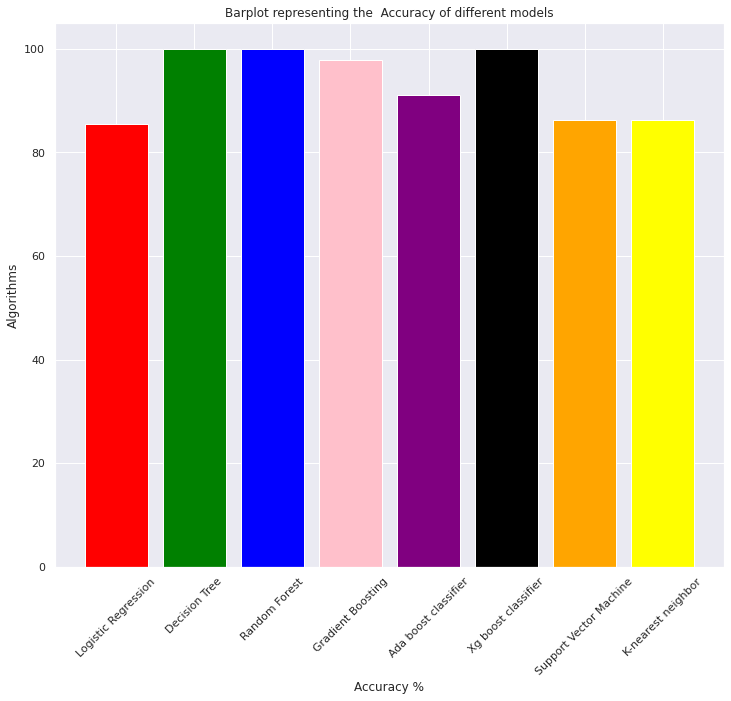

In [58]:
colors = ['red','green','blue','pink','purple','black','orange',"yellow"]
plt.figure(figsize=(12,10))
plt.title("Barplot representing the  Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(Evaluation['Model'],Evaluation['Accuracy'],color = colors)
plt.xticks(rotation = 45)
plt.show()

# Step 6: Conclusion

We have found the hidden data insights using visualization and 
compare different machine learning models based on accuracy 
and it is found that Decision Tree and Random Forest work efficiently
for this data set with accuracy 100%